# О наборе данных #

Этот набор данных содержит твиты, опубликованные для различных услуг и продуктов, а также эмоции, содержащиеся в твите. Он содержит три столбца:

* **tweet_text**;

* **emotion_in_tweet_is_directed_at**;

* **is_there_an_emotion_directed_at_a_brand_or_product**.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('C:/Users/Александр/pj/pet_projects/Tweets/final_data.csv', encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [9]:
df.columns=['text','platform','emotion']  # изменим названия колонок для удобной работы
df.head()

,text,platform,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [10]:
df.info()  # выведем информацию о типах и столбцах индекса, ненулевых значения и использовании памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9092 non-null   object
 1   platform  3291 non-null   object
 2   emotion   9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


## Обработаем нулевые значения

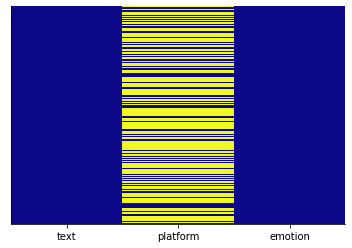

In [12]:
sns.heatmap(df.isnull(),cmap='plasma',cbar=False,yticklabels=False)
sns.despine()

Видно, что большинство значений в столбце *platform* являются нулевыми и, следовательно, не дают хорошего понимания данных, поэтому будет лучше удалить столбец.

In [13]:
df.drop('platform',axis=1,inplace=True)  # удалим столбец platform из-за его неинформативности
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [14]:
df.isnull().sum() # видим пропуск в тексте

text       1
emotion    0
dtype: int64

In [15]:
df.dropna(inplace=True)  #удаляем пропуск

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   emotion  9092 non-null   object
dtypes: object(2)
memory usage: 213.1+ KB


**Все нулевые значения были удалены из датасета, поэтому мы можем перейти к части предварительной обработки текста.**

# Предварительная обработка текста #

In [17]:
df.head()

,text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


### Колонка emotion

In [18]:
df['emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [19]:
# отправим "I can't tell" к "No emotion toward brand or product"
df['emotion'].replace("I can't tell","No emotion toward brand or product",inplace=True) 

In [20]:
df['emotion'].value_counts()

No emotion toward brand or product    5544
Positive emotion                      2978
Negative emotion                       570
Name: emotion, dtype: int64

In [21]:
# сопоставим типы эмоций с числовыми значенияем
# "Negative emotion" станет 0
# "No emotion toward brand or product" станет 1
# "Positive emotion" станет  2
df['emotion']=df['emotion'].map({"Negative emotion":0,"No emotion toward brand or product":1,"Positive emotion":2})

In [22]:
df['emotion'].value_counts()

1    5544
2    2978
0     570
Name: emotion, dtype: int64

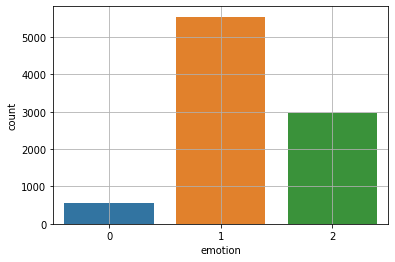

In [23]:
# на графике видим, что "No emotion toward brand or product" преобладает над остальными
sns.countplot(x='emotion',data=df)
plt.grid()

### Колонка text

In [24]:
import re

In [25]:
# преобразуем текст к нижнему регистру для удобства работы
df['text']=df['text'].apply(lambda x:x.lower())

In [26]:
df.head()

,text,emotion
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,0
1,@jessedee know about @fludapp ? awesome ipad/i...,2
2,@swonderlin can not wait for #ipad 2 also. the...,2
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,2


In [27]:
# удалим все ссылки из текста
df['text']=df['text'].apply(lambda x:re.sub('http[s]?://\S+',' ', x))

In [28]:
# также удалим все неалфавитные значения
df['text']=df['text'].apply(lambda x:re.sub(r'[^a-z]+',' ',x))

In [29]:
df.head()

,text,emotion
0,wesley i have a g iphone after hrs tweeting a...,0
1,jessedee know about fludapp awesome ipad ipho...,2
2,swonderlin can not wait for ipad also they sh...,2
3,sxsw i hope this year s festival isn t as cra...,0
4,sxtxstate great stuff on fri sxsw marissa may...,2


In [30]:
# исправим все неодинарные пробелы
df['text']=df['text'].apply(lambda x:" ".join(x.split()))

In [31]:
# добавим длинну для понимания длинны текста
df['length']=df['text'].apply(len)

In [32]:
df.head()

,text,emotion,length
0,wesley i have a g iphone after hrs tweeting at...,0,112
1,jessedee know about fludapp awesome ipad iphon...,2,132
2,swonderlin can not wait for ipad also they sho...,2,72
3,sxsw i hope this year s festival isn t as cras...,0,79
4,sxtxstate great stuff on fri sxsw marissa maye...,2,119


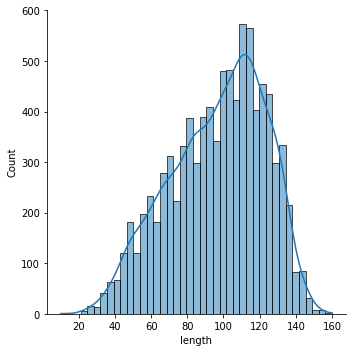

In [34]:
# распределение длинны сообщений
sns.displot(df['length'],kde=True)
sns.despine()

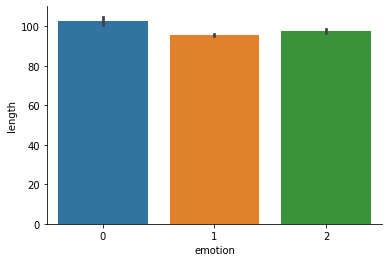

In [35]:
# отношение длины текста к эмоции
sns.barplot(x='emotion',y='length',data=df)
sns.despine()

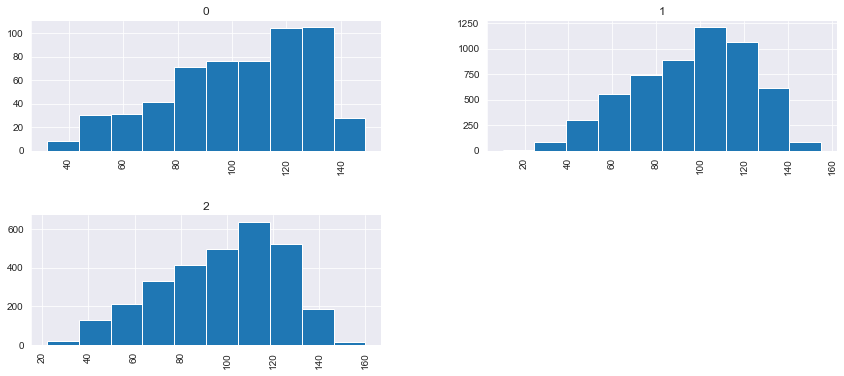

In [36]:
sns.set_style('darkgrid')
df.hist(column='length',by='emotion',figsize=(14,6))
sns.despine()

## Токенизация и удаление стоп-слов

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [49]:
def stopwords_removal(text):
    return [w for w in text.split() if w not in stopwords.words('english')]

In [53]:
df['text']=df['text'].apply(stopwords_removal)
df.head()

,text,emotion,length
0,"[wesley, g, iphone, hrs, tweeting, rise, austi...",0,112
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2,132
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2,72
3,"[sxsw, hope, year, festival, crashy, year, iph...",0,79
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2,119


In [54]:
# удалим колонку length
df.drop('length',axis=1,inplace=True)

In [56]:
def lemmatizer(text):
    lemma=WordNetLemmatizer()
    return [lemma.lemmatize(w) for w in text]

In [61]:
df['text']=df['text'].apply(lemmatizer)
df.head()

,text,emotion
0,"[wesley, g, iphone, hr, tweeting, rise, austin...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2


In [62]:
# удаляем слова из одной буквы и слово "sxsw"
def one_letter_word_removal(text):
    return [w for w in text if len(w)>1 and w!="sxsw"]

df['text']=df['text'].apply(one_letter_word_removal)
df.head(3)

,text,emotion
0,"[wesley, iphone, hr, tweeting, rise, austin, d...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale]",2


In [63]:
# присоединяем к списку слов для формирования отзыва
df['text']=df['text'].apply(lambda x:" ".join(x))
df.head()

,text,emotion
0,wesley iphone hr tweeting rise austin dead nee...,0
1,jessedee know fludapp awesome ipad iphone app ...,2
2,swonderlin wait ipad also sale,2
3,hope year festival crashy year iphone app,0
4,sxtxstate great stuff fri marissa mayer google...,2
